# Multi-Layer Perceptron (MLP) 

1 layer = linear boundary

2 layer = polygons (no holes) 

3 layer = can approximate anything!


## The Maths 

Backpropogation = algorithm for training multilayer perceptron. Single layer: 

$$ \Delta w_{ij} = x_i t_j$$
where $t_j$ = target value ($j$?) and $x_i$ in the input value ($i$). Neuron $i$ to neuron $j$!

But, we can't do this in a multi-layer perceptron since we don't know the targets! We shall need another strategy. 

$$ \delta E / \delta w_{ij} $$

### Forward pass
?? computing the output from the input...
### Backward pass
?? computing the error due to each node...

$$ \frac{\delta E}{\delta w_{}} = \frac{}{} * \frac{}{}$$


## Implementing a Multi-Layer Perceptron

In [19]:
import numpy as np 
import scipy.io as io
import matplotlib.pyplot as plt 

#### Backpropogation stuff

In [95]:
def _delta(g_prime, a, t, y):
    """
    a = activation 
    t = target value 
    y = actual value 
    """
    return np.array([-g_prime(ak)*(tk-yk) for (ak,tk,yk) in zip(a,t,y)])

def updateWeights(w_old, delta, z, eta):
    """ Update weights according to backpropogation formula
    w_old = old weight vector. w_kj = connects input j to hidden neuron k 
    """
    rows, cols = w_old.shape
    if len(delta) != rows:
        raise ValueError("weight shape %r and delta size %r don't match" % (w_old, delta))
    if len(z) != cols:
        raise ValueError("weight shape %r and z size %r don't match" % (w_old, z))
    
    w_new = np.zeros(w_old.shape)
    for k in range(rows):
        for j in range(cols):
            w_new[k,j] = w_old[k,j] - eta*delta[k]*z[j]
    return w_new

def error(t, y):
    """
    Computes error of output y w.r.t target value t.
    """
    if t.shape != y.shape:
        raise ValueError("t shape %r doesn't match y shape %r" % (t.shape, y.shape) )
    return 0.5* np.sum((t - y)**2)
#     return 0.5*sum([ (tk - yk)**2 for (tk,yk) in zip(t,y) ])

def backpropogation(X, T, v, w, f, g, dg, eta, iters):
    """Backpropogation algorithm for MLP with one hidden layer. Returns trained weights
    X = training data
    T = target outputs
    v = initial hidden weights
    w = initial output weights 
    f = hidden activation function, df = derivative of f
    g = output activation function, dg = derivative of g
    eta = learning rate
    iters = # iterations
    """
    N, dims = X.shape
    v_ = np.copy(v)
    w_ = np.copy(w)
    E = []
    for t in range(iters):
        Y = np.zeros(N)
        for i in range(N):
            # forward pass
            hidden = (lambda x : np.dot(v_, x))
            outer = (lambda z : np.dot(w_, z))
            x = X[i,:]
            u = hidden(x)
            z = f(u)
            a = outer(z)
            y = g(a)
            # backward pass (update weights)
            Y[i] = y
            Delta = _delta(dg, a, T[i], y)
            delta = np.multiply(dg(u), np.matmul(Delta, w_))
            w_ = updateWeights(w_, Delta, z, eta)
            v_ = updateWeights(v_, delta, x, eta)
        E.append(error(T, Y))
    plt.plot(E)
    plt.title('error function over time')
    return v_, w_

def MLP(x_in, v, w, f, g):
    """ Applies 2-layer perceptron to input"""
    Z = f(np.dot(v, x_in.T)) #activations at hidden layer 
    Y = g(np.dot(w, Z)) # activations at output 
    return Y

#### Activation functions

These functions are applied after the dot product with the weight vector. 

In [96]:
# hidden layer 
def f(x):
    return x
# output layer 
def g(x):
    """ sigmoid function """
    return 1/(1 + np.exp(-x))
def g_prime(x):
    return np.exp(-x)/(1 + np.exp(-x))**2

### Fun part: training the model on real data

#### Visualize training data

target outputs: 
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


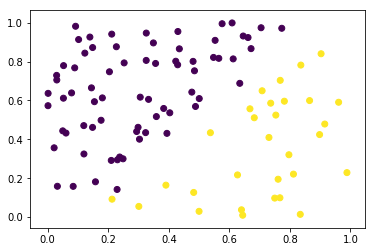

In [97]:
# load training data  
# D = io.loadmat("sem4_q5_nonlinsep_data.mat")['data']
D = io.loadmat("sem4_q5_linsep_data.mat")['data']

X = D[:,0:2] # input 
T = D[:,2]   # target output 
T[T==-1] = 0. # change target values to 0/1 from -1/1
print("target outputs: \n %r" % T)
plt.scatter(X[:,0],X[:,1], c = T)
plt.show()

#### Train the model 

In [98]:
import time 

# set up MLP 
N = np.shape(X)[0]  # size of dataset = 100
Ni = np.shape(X)[1] # input nodes  = 2 (dimensionality of data)
Nj = 5              # hidden nodes = 5 (why not)
Nk = 1              # output nodes = 1 (yes/no) 
v = np.random.rand(Nj,Ni)  # random initial hidden weights 
w = np.random.rand(Nk, Nj) # random initial output weights
# ^ cols = input dim, rows = output dim
eta = 0.01

# train the model! 
iters = 500
startTime = time.time()
v_t, w_t = backpropogation(X, T, v, w, f, g, g_prime, eta, iters)    
print("time to train model: %0.3f seconds \n " % (time.time() - startTime) )

TypeError: zip argument #2 must support iteration

#### Predict on training data

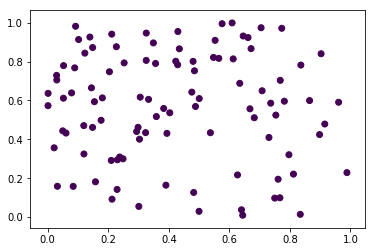

In [82]:
outputs = MLP(X, v_t, w_t, f, g)
decisions = np.floor(outputs + 0.5).reshape(N)
# print(decisions)
plt.scatter(D[:,0],D[:,1], c = decisions)
plt.show()

#### Predict on novel data

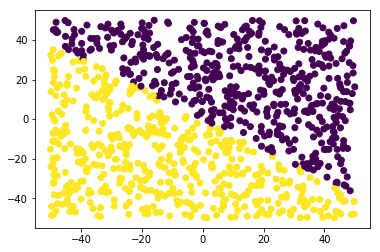

In [77]:
# generate grid data 
# N = 20
# newX = np.linspace(-5,5,N)
# newY = np.linspace(-5,5,N)
# XX, YY = np.meshgrid(newX, newY)
# X = XX.reshape(N*N)
# Y = YY.reshape(N*N)
# D = np.array([X,Y]).reshape(N*N, 2)
# print(D.shape)

n = 1000
Xrand = np.array(100*(np.random.rand(n,2) - 0.5))


# apply MLP 
outputs = MLP(Xrand, v_t, w_t, f, g)
decisions = np.floor(outputs + 0.5).reshape(n)
plt.scatter(Xrand[:,0],Xrand[:,1] , c = decisions)

In [ ]:
def error(t, y):
    """
    Computes error of output y w.r.t target value t.
    """
    return 0.5*sum([ (tk - yk)**2 for (tk,yk) in zip(t,y) ])